<a href="https://colab.research.google.com/github/Malikumair786/Machine_Learning/blob/main/DL_Project_1_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [83]:
cancer_data = pd.read_csv('/content/breast-cancer.csv')

In [84]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
cancer_data.shape

(569, 32)

In [86]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [87]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [88]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [89]:
cancer_data.replace({'diagnosis':{'B': 1, 'M': 0}}, inplace = True)

In [90]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0 --> malingant

1 --> Belign

In [91]:
cancer_data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [92]:
cancer_data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [93]:
X = cancer_data.drop(['diagnosis'], axis =1)
Y = cancer_data['diagnosis']

In [94]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [95]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [96]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [97]:
print(X.shape,X_train.shape,X_test.shape)

(569, 31) (455, 31) (114, 31)


In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
Scaler = StandardScaler()

X_train_std = Scaler.fit_transform(X_train)

X_test_std = Scaler.transform(X_test)

In [100]:
print(X_train_std)

[[-0.2394432  -0.01330339  1.7757658  ... -0.13236958 -1.08014517
  -0.03527943]
 [ 0.47435907 -0.8448276  -0.6284278  ... -1.11552632 -0.85773964
  -0.72098905]
 [-0.23982301  1.44755936  0.71180168 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.23953211 -0.46608541 -1.49375484 ... -1.32388956 -1.02997851
  -0.75145272]
 [ 0.48265433 -0.50025764 -1.62161319 ... -0.0987626   0.35796577
  -0.43906159]
 [-0.17757265  0.96060511  1.21181916 ...  0.8956983  -1.23064515
   0.50697397]]


**Building the Neural Network**

In [101]:
# import tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras 
#keras is not a standalone library, it is just a rapper of tensorflow

In [102]:
#Setting up a layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (31,)),     #input layer
    keras.layers.Dense(20,activation = 'relu'),     #1 Hidden layer
    keras.layers.Dense(2, activation = 'sigmoid')      #output layer
])

In [103]:
#Compiling the Neural Network

model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

dog or cat or horse

dog --> 0
cat --> 1 
horse --> 2

I'll use sparse_categorical_crossentropy in that case


dog or cat or horse

dog --> [1 0 0] cat --> [0 1 0] horse --> [0 0 1]

This is called 1 hot encoding of labels.

In [104]:
#training the neural network
history = model.fit(X_train_std,Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 15ms/step - loss: 0.5502 - accuracy: 0.7335 - val_loss: 0.3975 - val_accuracy: 0.8696
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8460 - val_loss: 0.2968 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2970 - accuracy: 0.9046 - val_loss: 0.2340 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2379 - accuracy: 0.9291 - val_loss: 0.1943 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1955 - accuracy: 0.9462 - val_loss: 0.1681 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.9609 - val_loss: 0.1494 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1478 - accuracy: 0.9658 - val_loss: 0.1345 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

The Goal is to reduce the loss value and increase the accuracy value

Visualizing the accuracy and loss 

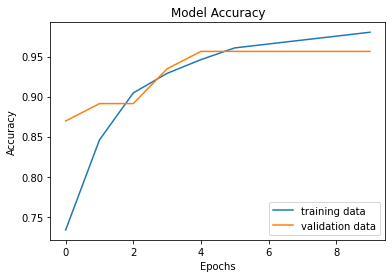

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epochs')
plt.legend(['training data','validation data'], loc='lower right')

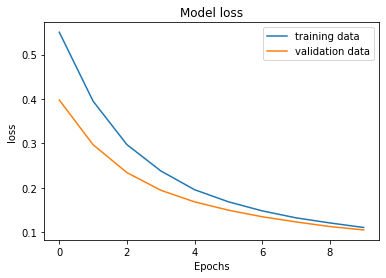

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend(['training data','validation data'], loc='upper right')

Accuracy of the model in test data

In [111]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 12ms/step - loss: 0.1221 - accuracy: 0.9474
0.9473684430122375


To build a predictive system

In [112]:
print(X_test_std.shape)

(114, 31)


In [113]:
print(X_test_std[0])

[-0.23949961 -0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457
 -0.11323672  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124
  2.62763999  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593
  2.88971815 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552
 -0.38767294  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515
 -0.6268286 ]


In [114]:
y_pred = model.predict(X_test_std)

In [115]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.11373478 0.6829313 ]


In [117]:
print(y_pred)

[[1.13734782e-01 6.82931304e-01]
 [5.68811774e-01 4.57951546e-01]
 [5.51955998e-02 8.54021013e-01]
 [9.77136850e-01 1.34676695e-04]
 [3.45538795e-01 5.14659584e-01]
 [8.80447865e-01 1.54028535e-02]
 [1.71205491e-01 5.11461854e-01]
 [1.26132756e-01 9.36614990e-01]
 [1.10700697e-01 8.18515897e-01]
 [2.21941888e-01 9.52805400e-01]
 [5.39761066e-01 6.82306349e-01]
 [1.99259073e-01 8.12237144e-01]
 [1.59167022e-01 8.54538321e-01]
 [3.91078413e-01 7.56962180e-01]
 [7.81783462e-02 8.98288488e-01]
 [8.73574615e-01 2.23374039e-01]
 [1.18810326e-01 9.46759701e-01]
 [4.59954739e-02 6.22837365e-01]
 [5.67443967e-02 8.62845540e-01]
 [7.68180251e-01 1.73351169e-02]
 [3.88459265e-02 1.05144858e-01]
 [9.94442999e-02 8.88542295e-01]
 [1.36263818e-01 8.68118763e-01]
 [9.20251906e-02 9.60108161e-01]
 [2.08212167e-01 9.11713302e-01]
 [8.10885251e-01 4.68462110e-02]
 [2.51242518e-01 7.12925792e-01]
 [3.74137282e-01 7.28885412e-01]
 [8.27869058e-01 7.75607526e-02]
 [8.67149591e-01 7.38762021e-02]
 [3.241369

In [118]:
print(X_test_std)

[[-0.23949961 -0.04462793 -1.41612656 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [-0.2467237   0.24583601 -0.06219797 ...  0.54129749  0.11047691
   0.0483572 ]
 [-0.17438876 -1.26115925 -0.29051645 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [-0.24002111  0.72709489  0.45836817 ...  1.46701686  1.19909344
   0.65319961]
 [-0.2400006   0.25437907  1.33054477 ... -1.29043534 -2.22561725
  -1.59557344]
 [-0.23978737  0.84100232 -0.06676434 ...  2.15137705  0.35629355
   0.37459546]]


In [120]:
print(y_pred)

[[1.13734782e-01 6.82931304e-01]
 [5.68811774e-01 4.57951546e-01]
 [5.51955998e-02 8.54021013e-01]
 [9.77136850e-01 1.34676695e-04]
 [3.45538795e-01 5.14659584e-01]
 [8.80447865e-01 1.54028535e-02]
 [1.71205491e-01 5.11461854e-01]
 [1.26132756e-01 9.36614990e-01]
 [1.10700697e-01 8.18515897e-01]
 [2.21941888e-01 9.52805400e-01]
 [5.39761066e-01 6.82306349e-01]
 [1.99259073e-01 8.12237144e-01]
 [1.59167022e-01 8.54538321e-01]
 [3.91078413e-01 7.56962180e-01]
 [7.81783462e-02 8.98288488e-01]
 [8.73574615e-01 2.23374039e-01]
 [1.18810326e-01 9.46759701e-01]
 [4.59954739e-02 6.22837365e-01]
 [5.67443967e-02 8.62845540e-01]
 [7.68180251e-01 1.73351169e-02]
 [3.88459265e-02 1.05144858e-01]
 [9.94442999e-02 8.88542295e-01]
 [1.36263818e-01 8.68118763e-01]
 [9.20251906e-02 9.60108161e-01]
 [2.08212167e-01 9.11713302e-01]
 [8.10885251e-01 4.68462110e-02]
 [2.51242518e-01 7.12925792e-01]
 [3.74137282e-01 7.28885412e-01]
 [8.27869058e-01 7.75607526e-02]
 [8.67149591e-01 7.38762021e-02]
 [3.241369

model.predcit()  Gives the predictio probability of each class for the data point

In [122]:
#Arg max function
my_list = [30,20,10]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[30, 20, 10]
0


In [123]:
#Converting the prediction probability to class labels


Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


**Building the predictive System**

In [124]:
input_data = (842517,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)

input_data_to_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one data point
input_data_reshaped = input_data_to_numpy_array.reshape(1,-1)

#Standardizing the input_data
input_data_std = Scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print("Tumor is malignant")
else:
  print("The Tumor is benign")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


[[0.82786906 0.07756075]]
[0]
Tumor is malignant


In [125]:
input_data = (897880,10.05,17.53,64.41,310.8,0.1007,0.07326,0.02511,0.01775,0.189,0.06331,0.2619,2.015,1.778,16.85,0.007803,0.01449,0.0169,0.008043,0.021,0.002778,11.16,26.84,71.98,384,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664)
input_data_to_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one data point
input_data_reshaped = input_data_to_numpy_array.reshape(1,-1)

#Standardizing the input_data
input_data_std = Scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print("Tumor is malignant")
else:
  print("The Tumor is benign")

[[0.05676517 0.87464845]]
[1]
The Tumor is benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
